In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux
from utils import log10eaxis, logjacob, makedist
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
sys.path.append("BFCalc")


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logmassaxis = np.linspace(-1,0.1,23)
colormap = cm.get_cmap('cool')

gridtointerpolate   = np.load(f"BFCalc/griddata/channel=W_massenergy_diffflux_grid.npy")
massvalues          = np.array(np.load(f"BFCalc/griddata/massvals_massenergy_diffflux_grid.npy"))
log10xvals        = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")

log10massvals = np.log10(massvalues)-3
gridtointerpolate

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_43664/1616034168.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.24879998e+01, 1.19703238e+01, 1.14906262e+01, ...,
        5.96842545e-06, 1.15681147e-05, 1.71510419e-05],
       [9.98350036e+00, 9.53116538e+00, 9.06462437e+00, ...,
        3.94605087e-06, 8.02093919e-06, 1.42669907e-05],
       [7.22717113e+00, 6.93930331e+00, 6.71352168e+00, ...,
        2.21894558e-06, 4.76784914e-06, 1.02489155e-05]])

In [3]:
DM_spectrum_setup(-1.0, normeaxis=10**log10eaxis)([-1.0,-0.99])

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:36: RuntimeWarning: divide by zero encountered in log
  logyvals = np.log(getspectrafunc(mDM=mDM, channel="W")(eaxis))


array([-inf, -inf])

In [4]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 23/23 [00:00<00:00, 396.20it/s]


In [5]:
print(special.logsumexp(spectravals[1,:]+logjacob))

-4.440892098500626e-16


In [6]:
spectravals[3,:]

array([ 4.6098696 ,  4.46970975,  4.32887613,  4.19047083,  4.02978446,
        3.89460603,  3.73825507,  3.58150511,  3.42899514,  3.24896607,
        3.10047859,  2.92603204,  2.75115357,  2.58250488,  2.37952634,
        2.21648971,  2.02159377,  1.82484943,  1.63502842,  1.4005294 ,
        1.2183728 ,  0.99547661,  0.77266003,  0.56542499,  0.30370715,
        0.13739596, -0.06220251, -0.2525122 , -0.41741907, -0.61499643,
       -0.88481183, -1.2554735 , -1.64799456, -2.00044358, -2.54957251,
       -2.83147263, -3.22547266, -3.60781053, -3.86092734, -4.20065191,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,      

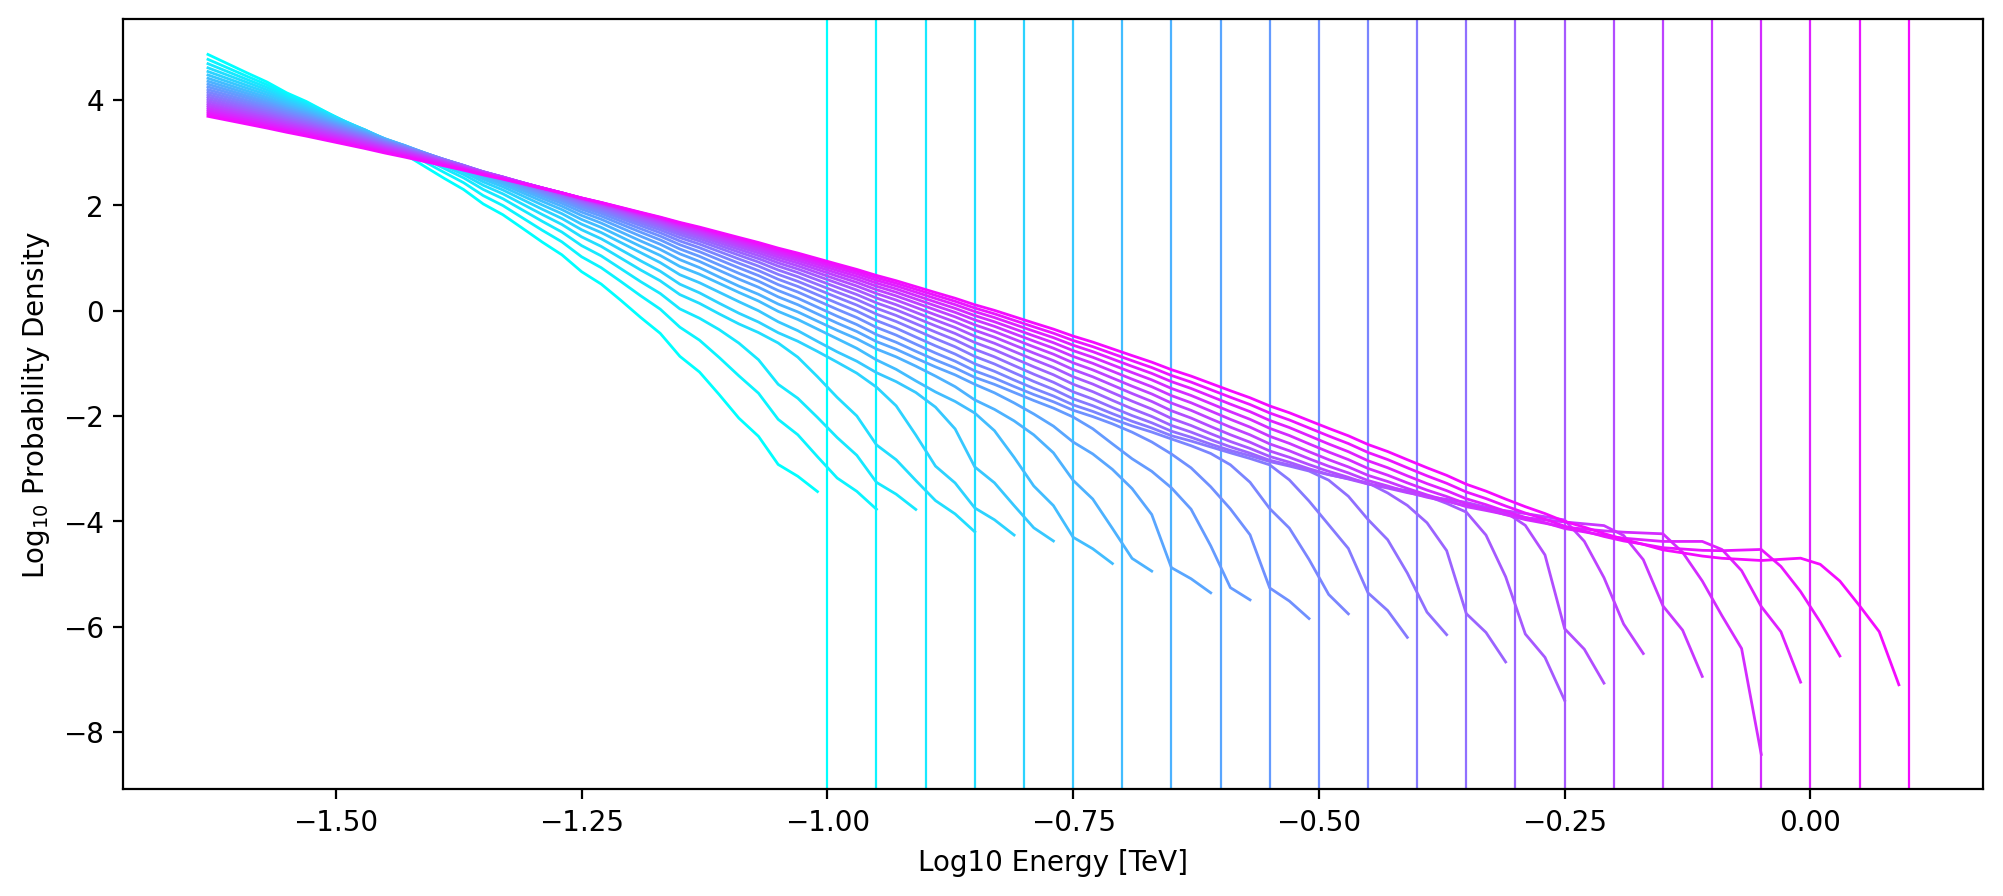

In [7]:
plt.figure(dpi=200, figsize=(12,5))
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
logjacob = np.log(np.log(10))+np.log(log10eaxis[1]-log10eaxis[0])+np.log(10**log10eaxis)
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    
    
    single_spectravals = np.array(spectravals)[idx,:]
    plt.plot(log10eaxis, single_spectravals, color=color, lw=1.0)
    plt.axvline(logmass, c=color, lw=0.8, linestyle='-')

# for logmassval in log10massvals:
#     plt.axvline(logmassval, c='tab:orange', lw=0.5, linestyle="--")
plt.xlabel('Log10 Energy [TeV]')

plt.ylabel(r'Log$_{10} $ Probability Density')
# plt.yscale('log')
# plt.xlim([-0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[0], 0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[-1]])
# plt.ylim([-8,0])

# plt.legend()
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_43664/2473672863.py:15: RuntimeWarning: divide by zero encountered in log
  np.log(gridtointerpolate).T)


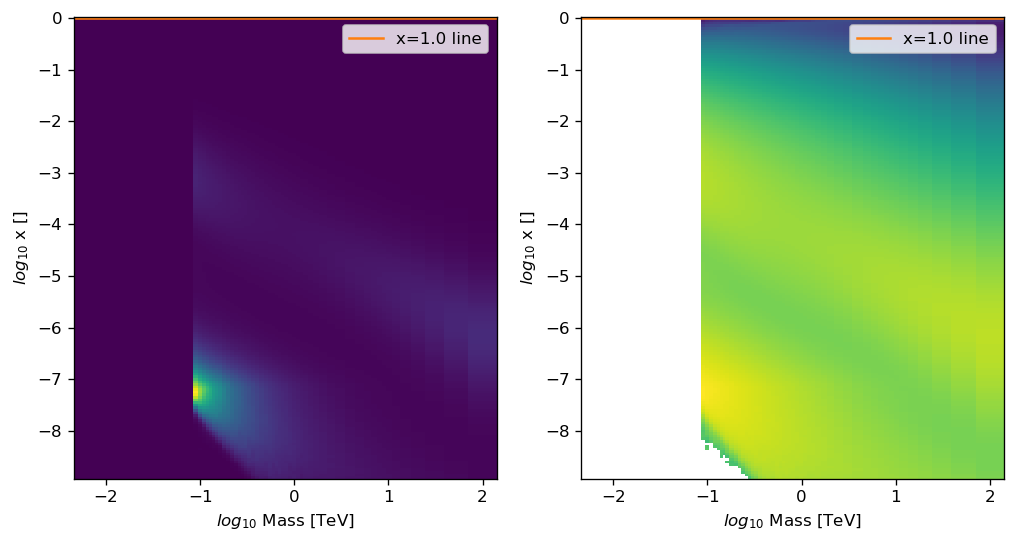

In [33]:
plt.figure(dpi=120,figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               (gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()

plt.subplot(1,2,2)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               np.log(gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")

plt.legend()


In [35]:
log10massvals.shape

(62,)

In [34]:
gridtointerpolate[log10massvals<-1.,]

(62, 179)

In [9]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

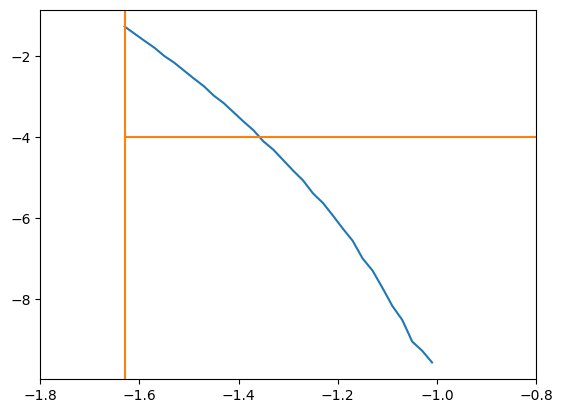

In [22]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(-1.0)(log10eaxis))
plt.plot(log10eaxis, 0*log10eaxis-4, c="tab:orange")
plt.axvline(log10eaxis[0], c="tab:orange")
plt.xlim(-1.8,-0.8)
plt.show()

In [11]:
special.logsumexp(makedist(logmass=1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [12]:
special.logsumexp(DM_spectrum_setup(1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0